In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def degreedist(G: nx.Graph, logs=False):
    degrees = dict(G.degree()).values()
    plt.hist(degrees, bins=30, log=logs, edgecolor="black")
    plt.xlabel("Sum of weight of adjacent nodes")
    plt.ylabel("Number of nodes")
    if logs:
        plt.xscale('log')
    plt.show()

# Data processed with customers as nodes and shared items as edges

In [37]:
dataset = pd.read_csv('./processed_customer_grocery_dataset.csv')

In [38]:
G: nx.Graph = nx.from_pandas_edgelist(dataset, 'source', 'dest', 'weight')

In [39]:
print(len(G.nodes))
print(len(G.edges))

3415
597908


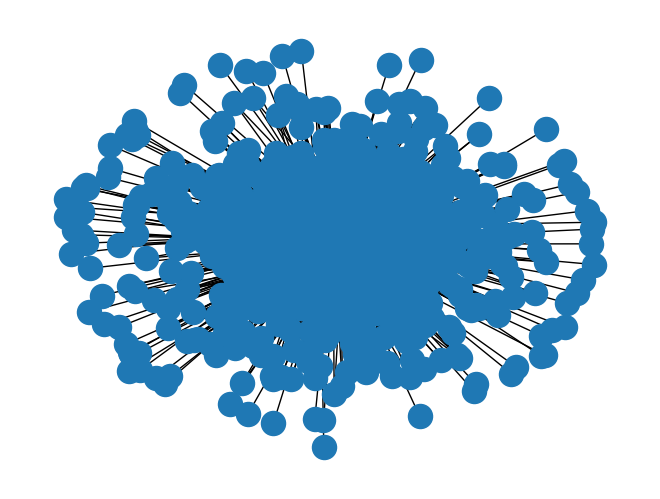

In [40]:
nx.draw(G)

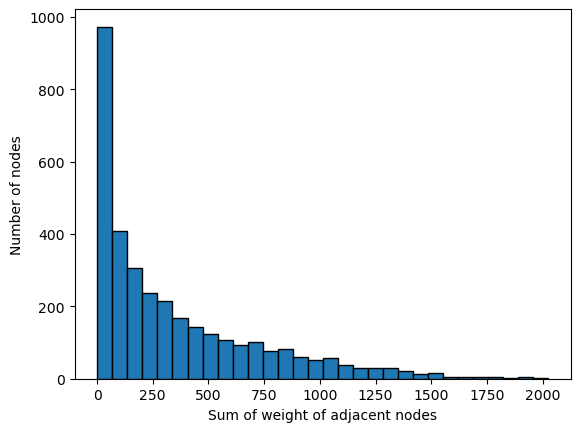

In [41]:
degreedist(G)

In [42]:
communities = nx.community.greedy_modularity_communities(G, 'weight')

In [43]:
print(len(communities))

3


In [44]:
pos = nx.spring_layout(G, weight='weight')

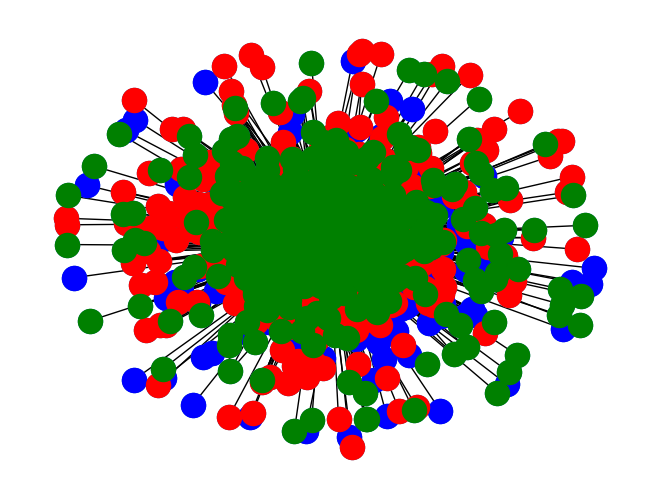

In [45]:
nx.draw(G, pos)
nx.draw_networkx_nodes(G, pos, nodelist=communities[0], node_color='b')
nx.draw_networkx_nodes(G, pos, nodelist=communities[1], node_color='r')
nx.draw_networkx_nodes(G, pos, nodelist=communities[2], node_color='g')

# Data processed with items as nodes and the shared customer as edges

In [4]:
item_dataset = pd.read_csv('./processed_item_grocery_dataset.csv')

In [5]:
G_i: nx.Graph = nx.from_pandas_edgelist(item_dataset, 'source', 'dest', 'weight')

In [6]:
print(len(G_i.nodes))
print(len(G_i.edges))

167
9824


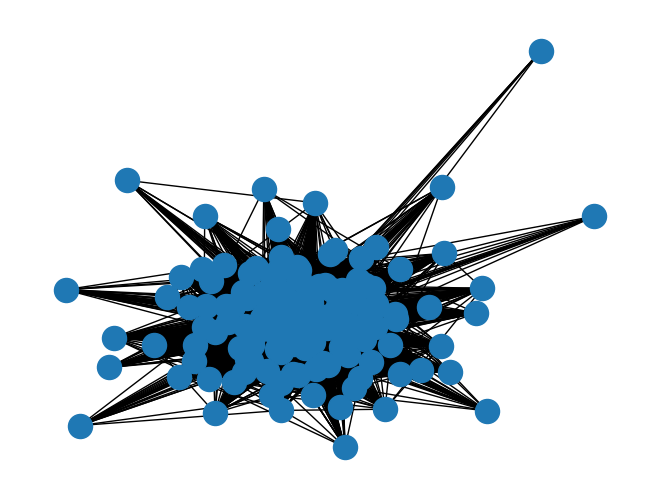

In [20]:
nx.draw(G_i)

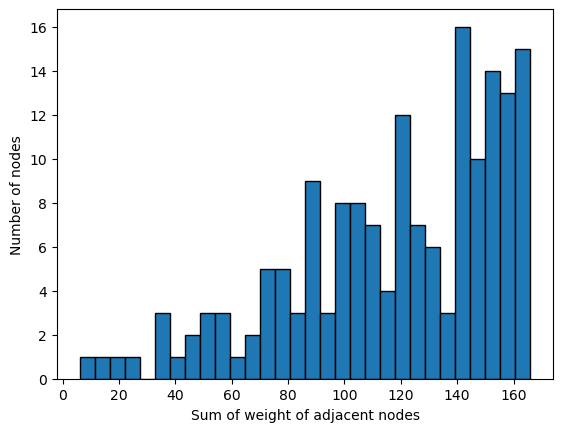

In [58]:
degreedist(G_i)

In [35]:
communities_i = nx.community.greedy_modularity_communities(G_i, 'weight')

In [36]:
print(len(communities_i))
print(nx.community.modularity(G_i, communities_i))

3
0.004117720689952605


In [7]:
pos_i = nx.spring_layout(G_i, weight='weight')

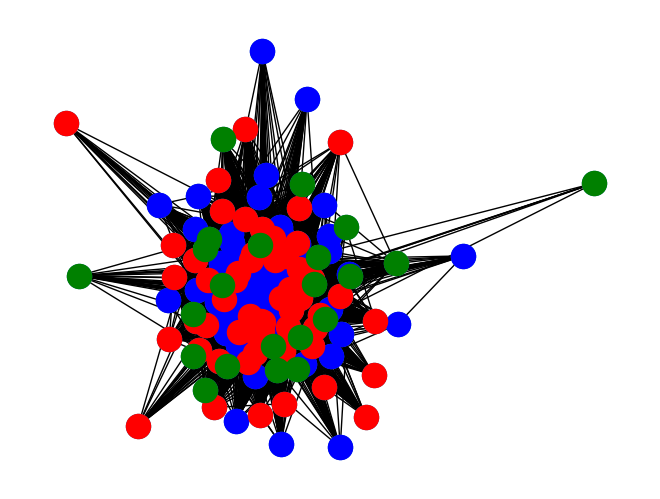

In [25]:
nx.draw(G_i, pos_i)
nx.draw_networkx_nodes(G_i, pos_i, nodelist=communities_i[0], node_color='b')
nx.draw_networkx_nodes(G_i, pos_i, nodelist=communities_i[1], node_color='r')
nx.draw_networkx_nodes(G_i, pos_i, nodelist=communities_i[2], node_color='g')


In [60]:
louvain_comm_i = nx.community.louvain_communities(G_i)

In [61]:
print(len(louvain_comm_i))

3


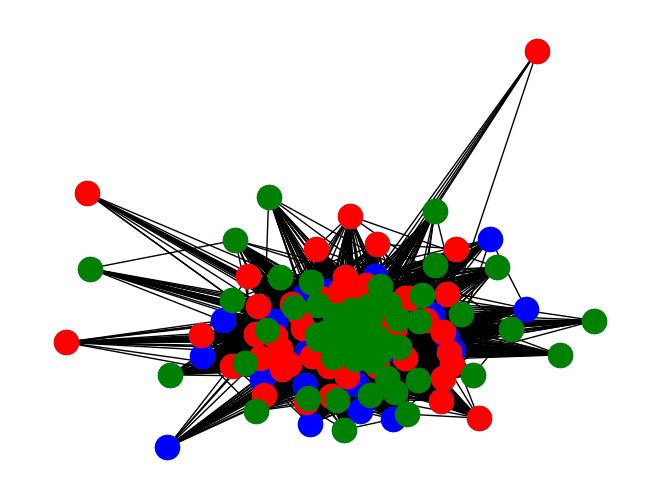

In [62]:
nx.draw(G_i, pos_i)
nx.draw_networkx_nodes(G_i, pos_i, nodelist=louvain_comm_i[0], node_color='b')
nx.draw_networkx_nodes(G_i, pos_i, nodelist=louvain_comm_i[1], node_color='r')
nx.draw_networkx_nodes(G_i, pos_i, nodelist=louvain_comm_i[2], node_color='g')

In [21]:
item_ng_community = nx.community.girvan_newman(G_i)

In [22]:
for i in item_ng_community:
    print(len(i), nx.community.modularity(G_i, i))

2 -5.848506290781881e-10
3 -6.3033903032608376e-09
4 -2.9047582036601616e-08
5 -6.80376250929207e-08
6 -1.566749897234162e-07
7 -2.566844500203559e-07
8 -4.204426309939994e-07
9 -7.053298788600249e-07
10 -1.0831433960209327e-06
11 -1.5438594921983209e-06
12 -2.3247975628347463e-06
13 2.4815700275832935e-06
14 1.4629713986515346e-06
15 5.184376056929131e-07
16 4.93769905208236e-06
17 9.185566767350794e-06
18 7.384226778368091e-06
19 1.045072868090461e-05
20 6.21041528644415e-06
21 8.152379364021738e-06
22 1.5424071130673353e-05
23 1.6072280596455787e-05
24 2.588230539500789e-05
25 1.831230730740963e-05
26 2.2410940632795288e-05
27 2.0676663518048746e-05
28 1.56400759692328e-05
29 6.956473514440514e-06


KeyboardInterrupt: 

# Date Item Data

In [47]:
data_item_dataset = pd.read_csv('./processed_data_items_grocery_dataset.csv')

In [49]:
data_item_graph = nx.from_pandas_edgelist(data_item_dataset, 'source', 'dest', 'weight')

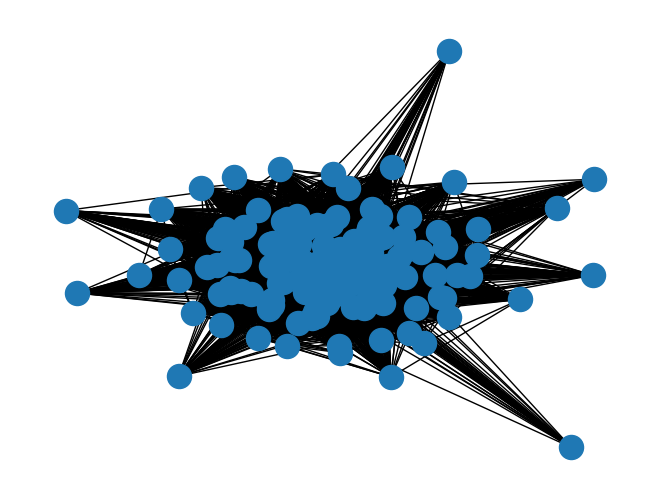

In [50]:
nx.draw(data_item_graph)

In [51]:
date_item_communities = nx.community.greedy_modularity_communities(data_item_graph)

In [52]:
len(date_item_communities)

2

In [53]:
pos_di = nx.spring_layout(data_item_graph)

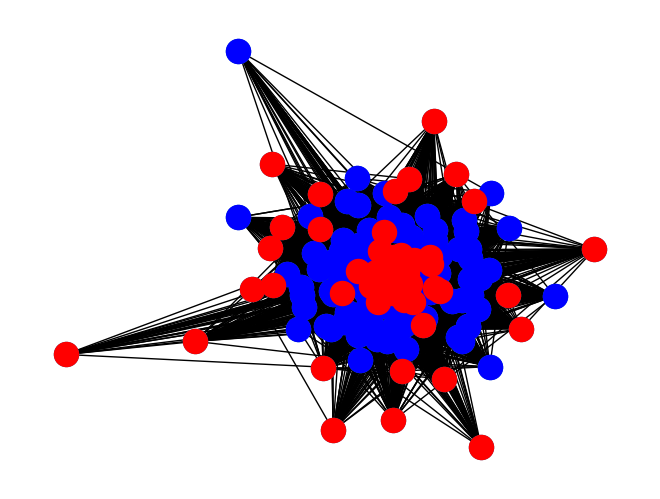

In [55]:
nx.draw(data_item_graph, pos_di)
nx.draw_networkx_nodes(data_item_graph, pos_di, nodelist=date_item_communities[0], node_color='b')
nx.draw_networkx_nodes(data_item_graph, pos_di, nodelist=date_item_communities[1], node_color='r')


In [85]:
cust_date_item_dataset = pd.read_csv('./processed_cust_date_items_grocery_dataset.csv')

In [86]:
cust_date_item_graph: nx.Graph = nx.from_pandas_edgelist(cust_date_item_dataset, 'source', 'dest', 'weight')

In [100]:
pos_cdi = nx.circular_layout(cust_date_item_graph)

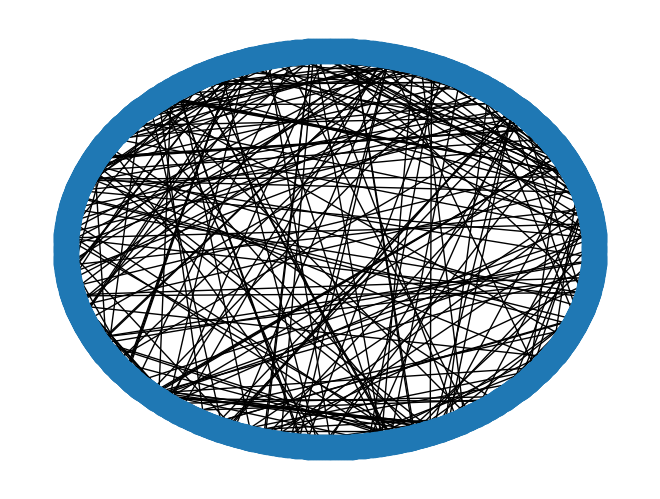

In [101]:
nx.draw(cust_date_item_graph, pos_cdi)

In [89]:
cdi_communities = nx.community.greedy_modularity_communities(cust_date_item_graph, 'weigth')

In [90]:
print(len(cdi_communities))
print(nx.community.modularity(cust_date_item_graph, cdi_communities))

319
0.9883683930957358


In [93]:
print(len(cust_date_item_graph.edges))
print(len(cust_date_item_graph.nodes))

865
1132


In [ ]:
colors = 256**2